# 18기 Clustering 정규세션 과제

## Clustering 해보기
### 1. Preprocssing / EDA
지금까지 배운 내용을 토대로 해당 데이터에 대해 자유롭게 전처리와 EDA를 진행해주세요.
### 2. Clustering 
수업 내용 및 실습 자료를 참고하여 클러스터링을 자유롭게 진행해주세요. 한 알고리즘에 대해 파라미터를 바꿔가며 비교를 해도 되고, 여러 알고리즘의 결과를 비교해도 됩니다.
### 3. Evaluation
결과에 대한 평가를 진행하고, 나름의 해석을 달아주세요.

**데이터:** [Mall Customer Segmentation Data| Kaggle](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

---

## 0. 데이터 불러오기

In [1]:
import pandas as pd
df = pd.read_csv("Mall_Customers.csv", index_col = 0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [2]:
# One-Hot Encoding
df = pd.get_dummies(df)
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
CustomerID,,,,,
1,19,15,39,0,1
2,21,15,81,0,1
3,20,16,6,1,0
4,23,16,77,1,0
5,31,17,40,1,0


### **Hierarchical clustering**

- Single linkage method  
    - 군집i에 속한 관측치와 군집j에 속한 관측치들의 모든 조합 간의 거리 중 가장 짧은 거리를 군집i와 군집j의 거리로 정의  
    - 계산이 효율적  
    - 근시안적: 길다란 형태의 군집 형성 가능  

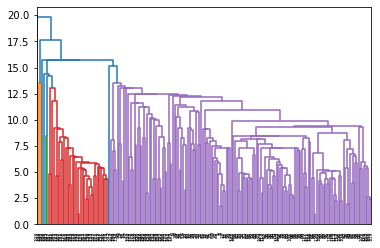

In [4]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

clust_single = linkage(df, method='single')

dendrogram(clust_single)
plt.show()

- Complete linkage method  
    - 군집i에 속한 관측치와 군집j에 속한 관측치들의 모든 조합 간의 거리 중 가장 긴 거리를 군집i와 군집j의 거리로 정의  
    - 군집과 군집을 합할 때 군집의 모든 개체가 서로 가깝게 됨  
    - Single linkage에 비해 convex한 군집 형성  
    - 이상치에 민감  

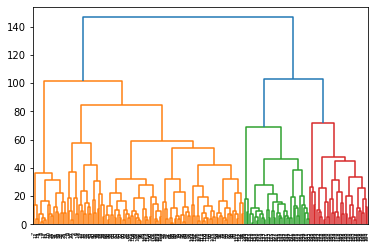

In [6]:
clust_complete = linkage(df, method='complete')

dendrogram(clust_complete)
plt.show()

- Average linkage method  
    - 군집i에 속한 관측치와 군집j에 속한 관측치들의 모든 조합 간의 거리 평균을 군집i와 군집j의 거리로 정의

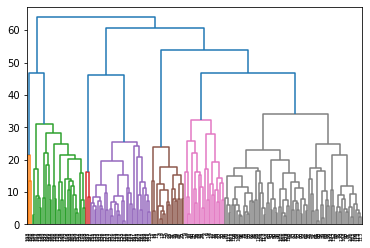

In [7]:
clust_avg = linkage(df, method='average')

dendrogram(clust_avg)
plt.show()

- Ward's method  
    - 매 단계에서 군집 간 정보의 손실을 최소화 하도록 군집  
        - Minimum variance method  
        - 클러스터 C의 군집내거리(within-cluster distance)를 최소화 하도록 군집  
    - 비슷한 크기의 군집을 생성하는 경향  
    - 비계층적 군집화 방법과 비슷한 결과를 생성하는 경향  

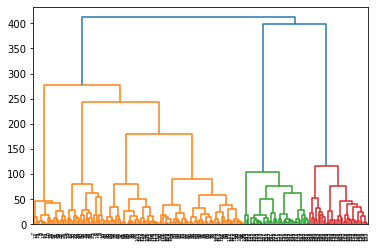

In [8]:
clust_ward = linkage(df, method='ward')

dendrogram(clust_ward)
plt.show()

In [11]:
df['cluster_ward'] = cut_tree(clust_ward, 3)
df.cluster_ward = df.cluster_ward.astype('category')
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,cluster_ward
CustomerID,,,,,,
1,19,15,39,0,1,0
2,21,15,81,0,1,0
3,20,16,6,1,0,0
4,23,16,77,1,0,0
5,31,17,40,1,0,0


In [12]:
df.cluster_ward.value_counts()

0    126
1     39
2     35
Name: cluster_ward, dtype: int64

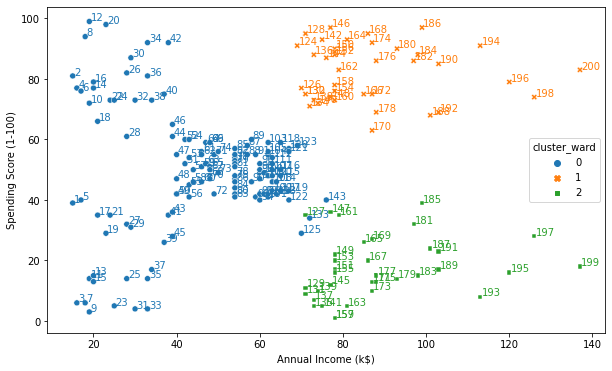

In [19]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", hue="cluster_ward", style="cluster_ward", data=df)
for i in range(df.shape[0]):
    plt.text(x = df['Annual Income (k$)'].iloc[i] + 0.3,
             y = df['Spending Score (1-100)'].iloc[i] + 0.3,
             s = df.index[i],
             color = sns.color_palette()[df['cluster_ward'].iloc[i]])
plt.show()

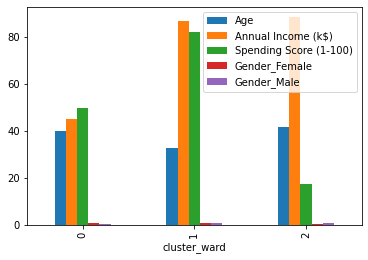

In [20]:
df.groupby('cluster_ward').mean().plot.bar()
plt.show()

### **KMeans clustering**

- Number of Clusters  
    - Elbow point

In [25]:
import numpy as np
from sklearn.cluster import KMeans

wss = []
for k in np.arange(1,20):
    km_k = KMeans(n_clusters=k).fit(df.iloc[:,:-1])
    wss.append(km_k.inertia_)

C:\Users\zyunhyeok\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


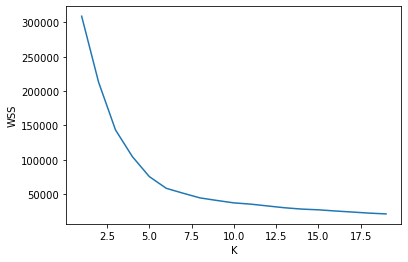

In [26]:
plt.plot(np.arange(1,20),wss)
plt.xlabel('K')
plt.ylabel('WSS')
plt.show()

In [27]:
km = KMeans(n_clusters=6).fit(df)

df['cluster_km']=km.labels_
df['cluster_km']=df['cluster_km'].astype('category')

df.cluster_km.value_counts()

0    44
1    39
3    38
4    35
2    22
5    22
Name: cluster_km, dtype: int64

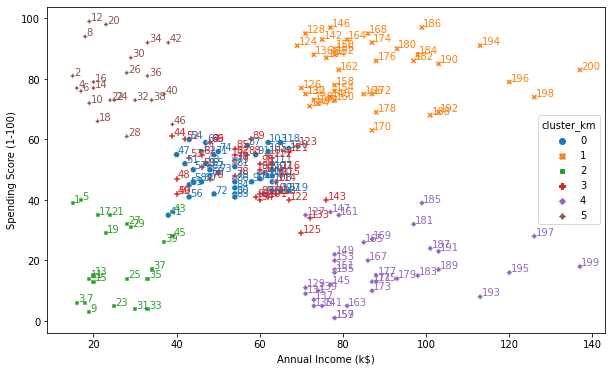

In [28]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", hue="cluster_km", style="cluster_km", data=df)
for i in range(df.shape[0]):
    plt.text(x = df['Annual Income (k$)'].iloc[i] + 0.3,
             y = df['Spending Score (1-100)'].iloc[i] + 0.3,
             s = df.index[i],
             color = sns.color_palette()[df['cluster_km'].iloc[i]])
plt.show()